# Assignment 2: recommender System

## Code from the lecture

In [1]:
#read data to DataFrames
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('../../DATA/movielens100k/u.user', sep='|', names=u_cols, encoding = "ISO-8859-1")

r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('../../DATA/movielens100k/u.data', sep='\t', names=r_cols, encoding = "ISO-8859-1")

m_cols=['movie_id', 'title', 'release date', 'video release date', 'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
movies = pd.read_csv('../../DATA/movielens100k/u.item', sep='|', names=m_cols ,encoding = "ISO-8859-1" )

In [2]:
#gerate matrix (this can be done more efficiently!)
R=np.zeros((np.shape(users)[0],np.shape(movies)[0]))
for i in range(np.shape(ratings)[0]):
    R[ratings['user_id'][i]-1, ratings['movie_id'][i]-1]=ratings['rating'][i]

In [3]:
epsilon=0.0000001 
def CosineDist(a,b):
    return a.dot(b)/(np.linalg.norm(a)*np.linalg.norm(b)+epsilon) #added epsilon for numerical stability: avoiding div by zero -> NaN

In [4]:
def EucledianDist(a,b):
    return np.sqrt(np.sum(np.square(a - b)))

In [5]:
#%%time
#again, implementation not efficient: better use lamda opperators 
#D=np.zeros((np.shape(movies)[0],np.shape(movies)[0]))
#for i in range(0,np.shape(movies)[0]):
 #   for j in range(0,np.shape(movies)[0]):
  #      if i!=j:
   #         #D[i,j]=CosineDist(R[:,i],R[:,j])
    #        D[i,j]=EucledianDist(R[:,i],R[:,j])

In [5]:
def getTopN(movie_id, D, N=5):
    return D[movie_id,:].argsort()[-N:]

def getIDbyName(name):
    if np.size(movies.movie_id[movies.title.str.contains(name)]) > 0:
        m = int(movies.movie_id[movies.title.str.contains(name)][:1]), str(movies.title[movies.title.str.contains(name)][:1])
        return m[0]-1
    else:
        return -1
    
def getNameByID(IDs):
    res=movies.iloc[IDs]
    return res.title

def CII(title, D):
    if getIDbyName(title) > 0:
        print ("recommending movies for: '" + str(getNameByID(getIDbyName(title)))+"'")
        return getNameByID(getTopN(getIDbyName(title),D))[::-1]
    else:
        print ("no movie title containing " + str(title) + "found...")
        
def Score_byID(ID, D, Test):
    #print ("Hit Scores for: ", getNameByID(ID))
    res_id = getTopN(ID,D)[::-1]
    res_title = getNameByID(getTopN(ID,D))[::-1]
    res_score = Test[res_id]
    return res_id, res_title, res_score, np.mean(res_score)
    
#compute scores for all test users
def test_Score(D_train, R_test):
    userScores=[]
    for i in range(R_test.shape[0]):
        userScore=0
        userTop = np.argsort(R_test[i])[-5:]
        for e in userTop:
            res_id, res_title, res_score, av_score = Score_byID(e,D_train, R_test[i])
            userScore+=av_score
        userScores.append(userScore/(5))
    return userScores

In [7]:
#CII("Casablanca",D)

## 4.1 Alternative Distance Measures
Implement a different distance measure, e.g. eucledian and compare the ressults.

## Test Cosinus-Distance

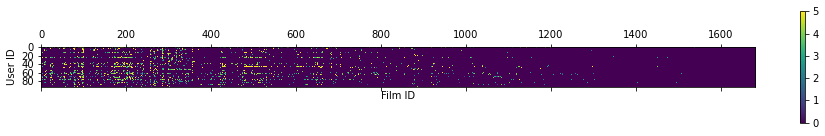

In [8]:
#split into train and test data
from sklearn.model_selection import train_test_split
R_train, R_test = train_test_split(R, test_size=0.1)
plt.matshow(R_test)
plt.xlabel('Film ID')
plt.ylabel('User ID')
plt.colorbar()

In [9]:
#again, implementation not efficient: better use lamda opperators (later in this course)
D_train=np.zeros((np.shape(movies)[0],np.shape(movies)[0]))
for i in range(0,np.shape(movies)[0]):
    for j in range(0,np.shape(movies)[0]):
        if i!=j:
            D_train[i,j]=CosineDist(R_train[:,i],R_train[:,j])
            #D_train[i,j]=EucledianDist(R[:,i],R[:,j])

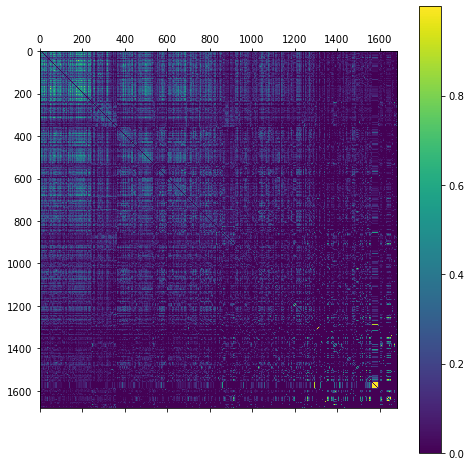

In [10]:
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.matshow(D_train)
plt.colorbar() 

In [11]:
#Anfrage auf dem Trainingsdatensatz
CII("Star",D_train)

recommending movies for: 'Star Wars (1977)'


180          Return of the Jedi (1983)
173     Raiders of the Lost Ark (1981)
171    Empire Strikes Back, The (1980)
0                     Toy Story (1995)
126              Godfather, The (1972)
Name: title, dtype: object

In [12]:
#get top 5 ids from random test user 23
np.argsort(R_test[23])[-5:]

array([259, 983, 331, 306, 267], dtype=int64)

In [13]:
def Score_byID(ID, D, Test):
    #print ("Hit Scores for: ", getNameByID(ID))
    res_id = getTopN(ID,D)[::-1]
    res_title = getNameByID(getTopN(ID,D))[::-1]
    res_score = Test[res_id]
    return res_id, res_title, res_score, np.mean(res_score)
    

In [14]:
Score_byID(326,D_train, R_test[23])

(array([301, 332, 267, 330, 285], dtype=int64),
 301       L.A. Confidential (1997)
 332               Game, The (1997)
 267             Chasing Amy (1997)
 330               Edge, The (1997)
 285    English Patient, The (1996)
 Name: title, dtype: object,
 array([0., 4., 5., 4., 4.]),
 3.4)

In [15]:
#compute scores for all test users
def test_Score(D_train, R_test):
    userScores=[]
    for i in range(R_test.shape[0]):
        userScore=0
        userTop = np.argsort(R_test[i])[-5:]
        for e in userTop:
            res_id, res_title, res_score, av_score = Score_byID(e,D_train, R_test[i])
            userScore+=av_score
        userScores.append(userScore/(5))
    return userScores

In [16]:
test_res=test_Score(D_train,R_test)

(array([ 9.,  8., 14., 12., 19., 12., 10.,  6.,  3.,  2.]),
 array([0.12 , 0.564, 1.008, 1.452, 1.896, 2.34 , 2.784, 3.228, 3.672,
        4.116, 4.56 ]),
 <BarContainer object of 10 artists>)

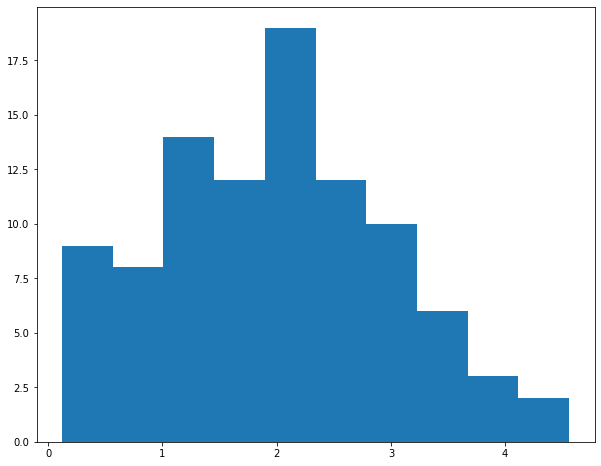

In [17]:
plt.hist(test_res)

In [18]:
np.mean(test_res)

2.0105263157894737

## Test Eucledian-Distance

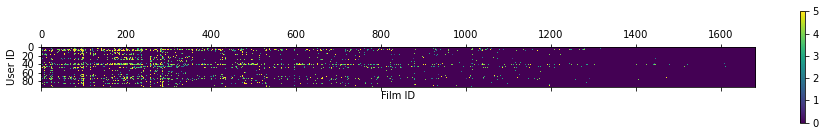

In [19]:
#split into train and test data
from sklearn.model_selection import train_test_split
R_train, R_test = train_test_split(R, test_size=0.1)
plt.matshow(R_test)
plt.xlabel('Film ID')
plt.ylabel('User ID')
plt.colorbar()

In [20]:
#again, implementation not efficient: better use lamda opperators (later in this course)
D_train=np.zeros((np.shape(movies)[0],np.shape(movies)[0]))
for i in range(0,np.shape(movies)[0]):
    for j in range(0,np.shape(movies)[0]):
        if i!=j:
            #D_train[i,j]=CosineDist(R_train[:,i],R_train[:,j])
            D_train[i,j]=EucledianDist(R[:,i],R[:,j])

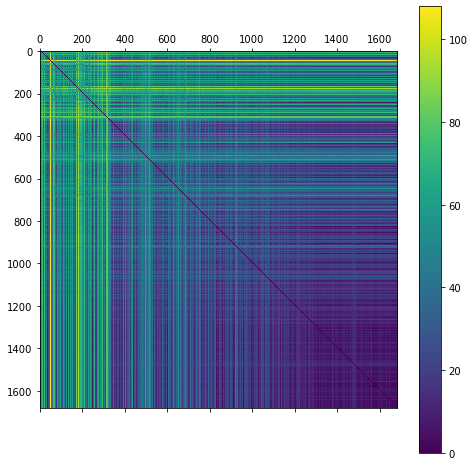

In [21]:
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.matshow(D_train)
plt.colorbar() 

In [22]:
#Anfrage auf dem Trainingsdatensatz
CII("Star",D_train)

recommending movies for: 'Star Wars (1977)'


989              Anna Karenina (1997)
1061    Four Days in September (1997)
1126          Truman Show, The (1998)
937        Smile Like Yours, A (1997)
1242               Night Flier (1997)
Name: title, dtype: object

In [23]:
#get top 5 ids from random test user 23
np.argsort(R_test[23])[-5:]

array([ 888, 1175, 1174,  257,  269], dtype=int64)

In [24]:
def Score_byID(ID, D, Test):
    #print ("Hit Scores for: ", getNameByID(ID))
    res_id = getTopN(ID,D)[::-1]
    res_title = getNameByID(getTopN(ID,D))[::-1]
    res_score = Test[res_id]
    return res_id, res_title, res_score, np.mean(res_score)
    

In [25]:
Score_byID(326,D_train, R_test[23])

(array([ 49,  99, 180, 173, 126], dtype=int64),
 49                   Star Wars (1977)
 99                       Fargo (1996)
 180         Return of the Jedi (1983)
 173    Raiders of the Lost Ark (1981)
 126             Godfather, The (1972)
 Name: title, dtype: object,
 array([0., 0., 0., 0., 0.]),
 0.0)

In [26]:
#compute scores for all test users
def test_Score(D_train, R_test):
    userScores=[]
    for i in range(R_test.shape[0]):
        userScore=0
        userTop = np.argsort(R_test[i])[-5:]
        for e in userTop:
            res_id, res_title, res_score, av_score = Score_byID(e,D_train, R_test[i])
            userScore+=av_score
        userScores.append(userScore/(5))
    return userScores

In [27]:
test_res=test_Score(D_train,R_test)

(array([15., 10., 13., 14., 16., 12.,  7.,  4.,  0.,  4.]),
 array([0.   , 0.436, 0.872, 1.308, 1.744, 2.18 , 2.616, 3.052, 3.488,
        3.924, 4.36 ]),
 <BarContainer object of 10 artists>)

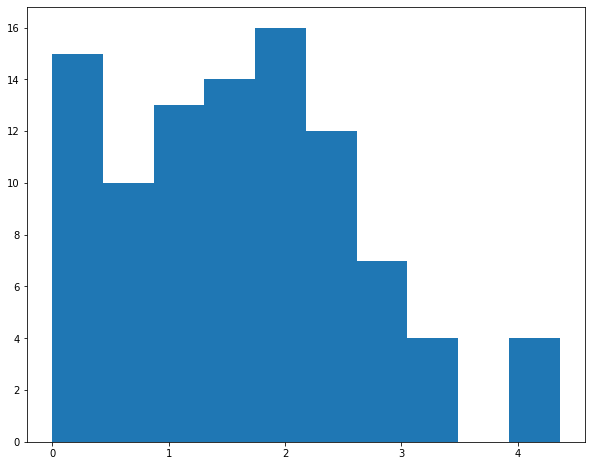

In [28]:
plt.hist(test_res)

In [29]:
np.mean(test_res)

1.5898947368421055

# Notes: Cosinus Distance
    - Time to compute D: ~ 45 s
    - D and R plots are similar to lecture slides
    - Same movie reccomendation as in the lecture slides
    - Test Score 2.0884210526315785

# Notes: Euclidean Distance
    - Time to compute D: ~ 31 s (Faster)
    - D plot looks quite different 
    - Movie recommendations are also quite different
    - Test Score 1.4821052631578946 (Worse)


## 4.2 Baseline Results
Implement and compare results of two very simple baseline methods 
* random recommendations: randomly recommend 5 movies (HINT user np.random sub-library to generate random movie IDs)
* always recommending the top 5 movies: HINT: need to find the IDs of the top 5 movies over all users first

### Test with 5 random movies

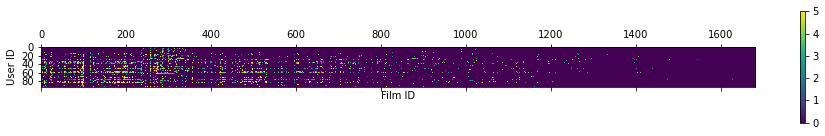

In [99]:
#split into train and test data
from sklearn.model_selection import train_test_split
R_train, R_test = train_test_split(R, test_size=0.1)
plt.matshow(R_test)
plt.xlabel('Film ID')
plt.ylabel('User ID')
plt.colorbar()

In [100]:
#again, implementation not efficient: better use lamda opperators (later in this course)
D_train=np.zeros((np.shape(movies)[0],np.shape(movies)[0]))
for i in range(0,np.shape(movies)[0]):
    for j in range(0,np.shape(movies)[0]):
        if i!=j:
            D_train[i,j]=CosineDist(R_train[:,i],R_train[:,j])
            #D_train[i,j]=EucledianDist(R[:,i],R[:,j])

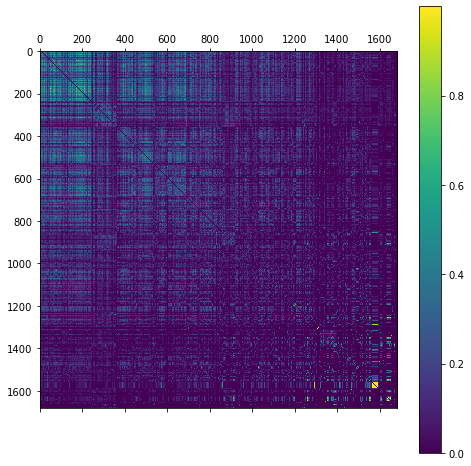

In [101]:
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.matshow(D_train)
plt.colorbar() 

In [102]:
#Anfrage auf dem Trainingsdatensatz
CII("Star",D_train)

recommending movies for: 'Star Wars (1977)'


180          Return of the Jedi (1983)
173     Raiders of the Lost Ark (1981)
171    Empire Strikes Back, The (1980)
0                     Toy Story (1995)
120      Independence Day (ID4) (1996)
Name: title, dtype: object

In [151]:
#get top 5 ids from random test user 23
np.argsort(R_test[23])[-5:]

array([1202,  429,  426,   55,  422], dtype=int64)

In [152]:
def Score_byID(ID, D, Test):
    #print ("Hit Scores for: ", getNameByID(ID))
    #res_id = getTopN(ID,D)[::-1]
    # generate 5 random id's between 0 - 1682
    res_id = np.random.randint(R_test.shape[1], size = 5)
    res_title = getNameByID(getTopN(ID,D))[::-1]
    res_score = Test[res_id]
    return res_id, res_title, res_score, np.mean(res_score)
    

In [153]:
res_id = np.random.randint(R_test.shape[1], size = 5)
res_id

array([1280, 1457,  922, 1191, 1348])

In [154]:
Score_byID(326,D_train, R_test[23])

(array([ 149,  298,  429,  200, 1121]),
 301       L.A. Confidential (1997)
 285    English Patient, The (1996)
 332               Game, The (1997)
 257                 Contact (1997)
 287                  Scream (1996)
 Name: title, dtype: object,
 array([0., 0., 5., 0., 0.]),
 1.0)

In [155]:
#compute scores for all test users
def test_Score(D_train, R_test):
    userScores=[]
    for i in range(R_test.shape[0]):
        userScore=0
        userTop = np.argsort(R_test[i])[-5:]
        #userTop = np.random.randint(R_test.shape[1]-1, size = 5)
        for e in userTop:
            res_id, res_title, res_score, av_score = Score_byID(e,D_train, R_test[i])
            userScore+=av_score
        userScores.append(userScore/(5))
    return userScores

In [156]:
test_res=test_Score(D_train,R_test)

(array([46., 10., 16.,  4.,  9.,  4.,  1.,  2.,  1.,  2.]),
 array([0.   , 0.136, 0.272, 0.408, 0.544, 0.68 , 0.816, 0.952, 1.088,
        1.224, 1.36 ]),
 <BarContainer object of 10 artists>)

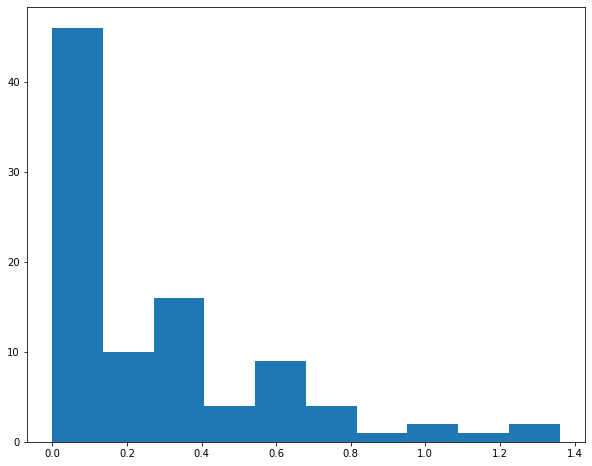

In [157]:
plt.hist(test_res)

In [158]:
np.mean(test_res)

0.25894736842105265

### Test with best 5 random movies

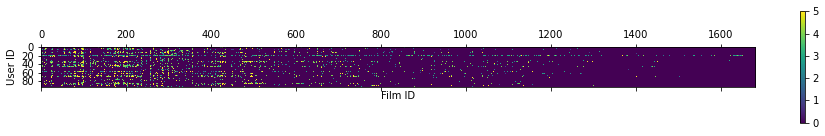

In [6]:
#split into train and test data
from sklearn.model_selection import train_test_split
R_train, R_test = train_test_split(R, test_size=0.1)
plt.matshow(R_test)
plt.xlabel('Film ID')
plt.ylabel('User ID')
plt.colorbar()

In [7]:
#again, implementation not efficient: better use lamda opperators (later in this course)
D_train=np.zeros((np.shape(movies)[0],np.shape(movies)[0]))
for i in range(0,np.shape(movies)[0]):
    for j in range(0,np.shape(movies)[0]):
        if i!=j:
            D_train[i,j]=CosineDist(R_train[:,i],R_train[:,j])
            #D_train[i,j]=EucledianDist(R[:,i],R[:,j])

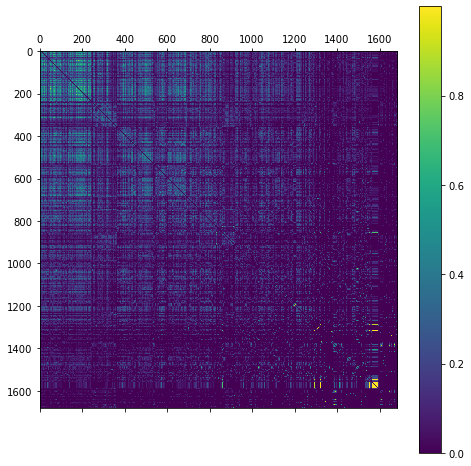

In [8]:
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.matshow(D_train)
plt.colorbar() 

In [9]:
#Anfrage auf dem Trainingsdatensatz
CII("Star",D_train)

recommending movies for: 'Star Wars (1977)'


180          Return of the Jedi (1983)
173     Raiders of the Lost Ark (1981)
171    Empire Strikes Back, The (1980)
0                     Toy Story (1995)
120      Independence Day (ID4) (1996)
Name: title, dtype: object

In [10]:
#get top 5 ids from random test user 23
np.argsort(R_test[23])[-5:]

array([478, 173, 172, 285, 426], dtype=int64)

In [11]:
def Score_byID(ID, D, Test):
    #print ("Hit Scores for: ", getNameByID(ID))
    #res_id = getTopN(ID,D)[::-1]
    # generate 5 random id's between 0 - 1682
    res_id = np.random.randint(R_test.shape[1]-1, size = 5)
    res_title = getNameByID(getTopN(ID,D))[::-1]
    res_score = Test[res_id]
    return res_id, res_title, res_score, np.mean(res_score)
    

In [12]:
R_test.shape

(95, 1682)

In [55]:
np.argsort(R_test[23])[-5:]

array([478, 173, 172, 285, 426], dtype=int64)

In [96]:
np.sort(R_test[8])[-5:]

array([5., 5., 5., 5., 5.])

In [53]:
top5array = np.zeros((95,5))
top1array = np.zeros((95,1))
i = 0
while i < 95:
    top5array[i] = np.argsort(R_test[i])[-5:]
    top1array[i] = top5array[i][0]
    i = i+1

In [97]:
np.argsortop5array

array([[1176.,  368.,  760.,  299.,   49.],
       [ 269.,  219.,  475.,  236.,   24.],
       [ 318., 1021., 1061.,  895.,  749.],
       [ 208.,  264.,  606.,  660.,  256.],
       [ 180.,  478.,  177.,  171.,   68.],
       [ 179.,   63.,   21.,  627.,  565.],
       [ 116.,    8.,   49.,   99.,  514.],
       [  12.,   13.,  299.,  123.,    8.],
       [ 126.,  178.,   21.,   63.,   55.],
       [   0.,  285.,  514.,  257.,   24.],
       [ 749.,  343.,  344.,  314.,  326.],
       [ 132.,  431.,  131.,  602.,  632.],
       [ 297.,  225.,  194.,  186.,   81.],
       [1405.,  401.,  154.,  780.,  777.],
       [ 314., 1175., 1021.,  271.,  312.],
       [ 185.,  186.,  187.,  179.,  244.],
       [ 422.,  428.,  749.,  267.,  748.],
       [ 426.,   94.,  507.,  299.,  353.],
       [ 287.,  268.,  299.,  285.,  301.],
       [ 877., 1025.,  338.,  881.,  357.],
       [ 293.,  150.,  126., 1141.,   49.],
       [ 293.,  268.,  483.,  312.,  198.],
       [ 513.,  186.,   29.,  26

In [119]:
Score_byID(326,D_train, R_test[23])

(array([1488, 1373,   94,  877, 1438]),
 301       L.A. Confidential (1997)
 285    English Patient, The (1996)
 332               Game, The (1997)
 257                 Contact (1997)
 287                  Scream (1996)
 Name: title, dtype: object,
 array([0., 0., 3., 0., 0.]),
 0.6)

In [120]:
#compute scores for all test users
def test_Score(D_train, R_test):
    userScores=[]
    for i in range(R_test.shape[0]):
        userScore=0
        userTop = np.argsort(R_test[i])[-5:]
        #userTop = np.random.randint(R_test.shape[1]-1, size = 5)
        for e in userTop:
            res_id, res_title, res_score, av_score = Score_byID(e,D_train, R_test[i])
            userScore+=av_score
        userScores.append(userScore/(5))
    return userScores

In [121]:
test_res=test_Score(D_train,R_test)

(array([46., 18.,  8., 11.,  2.,  3.,  4.,  2.,  0.,  1.]),
 array([0.   , 0.144, 0.288, 0.432, 0.576, 0.72 , 0.864, 1.008, 1.152,
        1.296, 1.44 ]),
 <BarContainer object of 10 artists>)

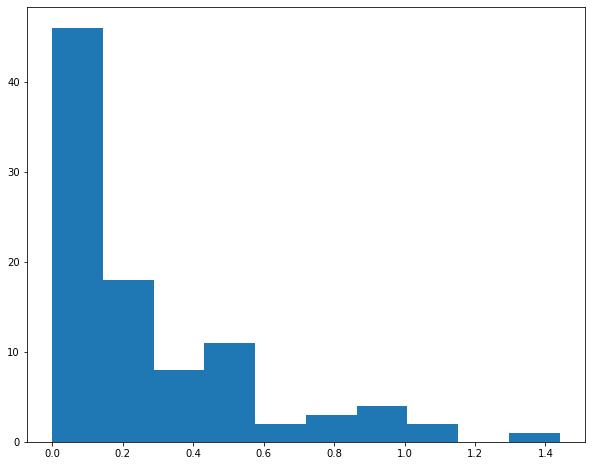

In [122]:
plt.hist(test_res)

In [123]:
np.mean(test_res)

0.25389473684210523

## 4.3 SVD
Implement the SVD approach. Hints: 
* use numpy.linalg.svd()
* apply SVD on $D$
* plot the singular values and decide where to cut off the reconstruction
* reconstruct and evaluate $D'$
